In [1]:
import sys
import shutil
import random
import pathlib

import matplotlib.pyplot as plt 
import pandas as pd
import torch
import ultralytics
import yaml
from pathlib import Path
from IPython import display
from PIL import Image
from tqdm.notebook import tqdm
from ultralytics import YOLO

In [2]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---")
print("matplotlib version:", plt.matplotlib.__version__)
print("pandas version:", pd.__version__)
print("PIL version:", Image.__version__)
print("PyYAML version:", yaml.__version__)
print("torch version:", torch.__version__)
print("ultralytics version:", ultralytics.__version__)

Platform: win32
Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
---
matplotlib version: 3.9.2
pandas version: 2.2.3
PIL version: 10.2.0
PyYAML version: 6.0.2
torch version: 2.5.0+cu124
ultralytics version: 8.3.19


In [3]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(f"Using {device} device.")

Using cuda device.


In [4]:
training_dir = pathlib.Path("C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg//images/train")
validation_dir = pathlib.Path("C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/images/val")
test_dir = pathlib.Path("C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/images/test")
print(training_dir)
print(validation_dir)
print(test_dir)

C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\Crack_Segmentation_Using_Yolo\crack-seg\images\train
C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\Crack_Segmentation_Using_Yolo\crack-seg\images\val
C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\Crack_Segmentation_Using_Yolo\crack-seg\images\test


In [5]:
num_train_dir = len(list(training_dir.iterdir()))
num_val_dir = len(list(validation_dir.iterdir()))
num_test_dir = len(list(test_dir.iterdir()))


print(f"The training list:{num_train_dir}")
print(f"The validation list: {num_val_dir}")
print(f"The test list: {num_test_dir}")

The training list:3717
The validation list: 200
The test list: 112


In [6]:
import cv2

def check_image_sizes(directory):
    print(f"\nChecking images in: {directory}")
    for img_path in directory.glob("*.jpg"):  # change to "*.png" if needed
        img = cv2.imread(str(img_path))
        if img is None:
            print(f"⚠️ Could not read {img_path}")
            continue
        h, w, c = img.shape
        print(f"{img_path.name}: {w}x{h}, {c} channels")

# Run for each dataset split
check_image_sizes(training_dir)
check_image_sizes(validation_dir)
check_image_sizes(test_dir)



Checking images in: C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\Crack_Segmentation_Using_Yolo\crack-seg\images\train
10.rf.1be181322657e5592be06e9ed277e0b3.jpg: 416x416, 3 channels
10.rf.c00d0aefdcdaee98c7e1a821da0724d9.jpg: 416x416, 3 channels
10.rf.eabd363770a56fc07783cda4bed7d276.jpg: 416x416, 3 channels
1177.rf.6bb0830b57f7fd1ed4aa0dbabb8688c2.jpg: 416x416, 3 channels
1177.rf.a940ca1af97795c8438820a9003156a1.jpg: 416x416, 3 channels
1177.rf.c0bd651b5143023232bf5bdfcc735a71.jpg: 416x416, 3 channels
1212.rf.47327a2f0cfd0d93213066fc52fe2650.jpg: 416x416, 3 channels
1212.rf.80ae3c1ff03d713bc845b9878af03c9a.jpg: 416x416, 3 channels
1212.rf.f430748755bef3588eaf9a0ec58b6c69.jpg: 416x416, 3 channels
1231.rf.104ee9fb0ca467980d6fbc8dc84554e9.jpg: 416x416, 3 channels
1231.rf.8312cf3a24ef4138e21ec8d0f4f9b973.jpg: 416x416, 3 channels
1231.rf.926bbdda64bad09c5eb0358396ae86c2.jpg: 416x416, 3 channels
1267.rf.3a04a01b52931b133db3468da

In [7]:
from torchvision import transforms

In [10]:
import torch
torch.cuda.empty_cache()

model = YOLO("yolov8s-seg.pt")

100%|██████████| 22.8M/22.8M [00:03<00:00, 6.22MB/s]


In [11]:
print(model)

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_runnin

<b>Step 1: Define your transform pipeline for segmentation</b>

In [13]:
import torch
from torchvision import transforms
from torchvision.transforms import functional as F
from PIL import Image
import random

TARGET_HEIGHT = 416
TARGET_WIDTH = 416

class SegmentationTransform:
    def __init__(self):
        self.hflip = transforms.RandomHorizontalFlip(p=0.5)
        self.color = transforms.ColorJitter(
            brightness=0.4,
            contrast=0.2,
            saturation=0.2,
            hue=0.02
        )
        self.affine_params = dict(
            degrees=0,
            translate=(0.1, 0.1),
            scale=(0.5, 1.5),
            shear=0.0
        )
        self.resize = transforms.Resize((TARGET_HEIGHT, TARGET_WIDTH))

    def __call__(self, img, mask):
        # Random Horizontal Flip (same for both)
        if random.random() < 0.5:
            img = F.hflip(img)
            mask = F.hflip(mask)

        # Color jitter (only on image)
        img = self.color(img)

        # Random affine (same params for both image and mask)
        angle, translate, scale, shear = transforms.RandomAffine.get_params(
            self.affine_params["degrees"],
            self.affine_params["translate"],
            self.affine_params["scale"],
            self.affine_params["shear"],
            img.size
        )
        img = F.affine(img, angle, translate, scale, shear)
        mask = F.affine(mask, angle, translate, scale, shear)

        # Resize (same for both)
        img = self.resize(img)
        mask = self.resize(mask)

        # Convert to tensor
        img = F.to_tensor(img)           # float tensor [0,1]
        mask = torch.tensor(np.array(mask), dtype=torch.long)  # integer labels

        return img, mask


<b>Step 2: Custom Dataset class</b>

In [18]:
import os
import numpy as np
from torch.utils.data import Dataset

class CrackSegmentationDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = sorted([f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        self.masks = sorted([f for f in os.listdir(mask_dir) if f.endswith(('.png', '.jpg', '.jpeg'))])
        print("Number of images:", len(self.images))
        print("Number of masks:", len(self.masks))
        print("First 5 image files:", self.images[:5])
        print("First 5 mask files:", self.masks[:5])
    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.masks[idx])

        img = Image.open(img_path).convert("RGB")
        mask = Image.open(mask_path).convert("L")  # grayscale mask

        if self.transform:
            img, mask = self.transform(img, mask)

        return img, mask


<b>Step 3: Use it with DataLoader</b>

In [19]:
from torch.utils.data import DataLoader

# Paths
train_img_dir = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/images/train"
train_mask_dir = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/labels/train"
val_img_dir = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/images/val"
val_mask_dir = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/labels/val"
test_img_dir = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/images/test"
test_mask_dir = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/labels/test"

# Dataset with augmentation
train_dataset = CrackSegmentationDataset(
    train_img_dir,
    train_mask_dir,
    transform=SegmentationTransform()
)

val_dataset = CrackSegmentationDataset(
    val_img_dir,
    val_mask_dir,
    transform=SegmentationTransform()
)

test_dataset = CrackSegmentationDataset(
    test_img_dir,
    test_mask_dir,
    transform=SegmentationTransform()
)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)


# Example: get one batch
images_train, mask_train = next(iter(train_loader))
print(images_train.shape)  # [B, 3, 416, 416]
print(mask_train.shape)   # [B, 416, 416]


images_val, mask_val = next(iter(val_loader))
print(images_val.shape)
print(mask_val.shape)


images_test, mask_test = next(iter(test_loader))
print(images_test.shape)
print(mask_test.shape)


Number of images: 3717
Number of masks: 0
First 5 image files: ['10.rf.1be181322657e5592be06e9ed277e0b3.jpg', '10.rf.c00d0aefdcdaee98c7e1a821da0724d9.jpg', '10.rf.eabd363770a56fc07783cda4bed7d276.jpg', '1177.rf.6bb0830b57f7fd1ed4aa0dbabb8688c2.jpg', '1177.rf.a940ca1af97795c8438820a9003156a1.jpg']
First 5 mask files: []
Number of images: 200
Number of masks: 0
First 5 image files: ['1604.rf.7229a9adfa1c9ec285d55c965172ea32.jpg', '1605.rf.53a5ea427ceda0b3d6abbc79c64efc36.jpg', '1610.rf.3271e8c1058a3a701de2d96b621e9080.jpg', '1619.rf.5a42efe0c04aca69843e73fcc3a1a1bc.jpg', '1622.rf.da42af8068237feeeaa4db6f8628ccb2.jpg']
First 5 mask files: []
Number of images: 112
Number of masks: 0
First 5 image files: ['1616.rf.c868709931a671796794fdbb95352c5a.jpg', '1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg', '1686.rf.809fb1b51c607e5cf787e44ef4ddd7b8.jpg', '1706.rf.011d213c21ec78896c36728dcbc156f5.jpg', '1716.rf.85ea38b36008beaa72c5d8541f734eb0.jpg']
First 5 mask files: []


IndexError: list index out of range

In [20]:
data_path = "C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/crack-seg.yaml"

print(data_path)

C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/crack-seg.yaml


In [21]:
import torch
torch.cuda.empty_cache()

results = model.train(
    data=str(data_path),
    epochs=30,
    imgsz=320,
    batch=2,
    workers=2,
)


New https://pypi.org/project/ultralytics/8.3.199 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.19  Python-3.11.9 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
engine\trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/Crack_Segmentation_Using_Yolo/crack-seg/crack-seg.yaml, epochs=30, time=None, patience=100, batch=2, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=2, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_st

train: Scanning C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\Crack_Segmentation_Using_Yolo\crack-seg\labels\train.cache... 3717 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3717/3717 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


c:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\yolo\Lib\site-packages\ultralytics\data\augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\Crack_Segmentation_Using_Yolo\crack-seg\labels\val.cache... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]


Plotting labels to runs\segment\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 2 dataloader workers
Logging results to runs\segment\train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/30     0.476G      1.696      1.858      1.733      1.435          5        320: 100%|██████████| 1859/1859 [06:23<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  7.12it/s]


                   all        200        249      0.399      0.486      0.335      0.098      0.351      0.414      0.247     0.0539

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/30     0.501G      1.658      1.715      1.518      1.475          1        320: 100%|██████████| 1859/1859 [05:00<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:08<00:00,  5.59it/s]

                   all        200        249      0.564      0.598      0.525      0.197      0.449      0.506      0.372     0.0897



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/30     0.503G      1.512      1.673       1.39      1.382          1        320: 100%|██████████| 1859/1859 [05:35<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.81it/s]

                   all        200        249      0.419      0.369      0.329      0.122      0.483      0.466      0.387       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/30     0.501G      1.459      1.652      1.299      1.348          3        320: 100%|██████████| 1859/1859 [05:57<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:08<00:00,  5.66it/s]

                   all        200        249      0.693      0.514      0.565      0.274      0.654      0.486      0.465      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/30      0.48G      1.335       1.59      1.238      1.289          2        320: 100%|██████████| 1859/1859 [04:39<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.99it/s]

                   all        200        249      0.686      0.655      0.646      0.366      0.669      0.602      0.565      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/30      0.48G      1.293      1.581      1.202      1.276          3        320: 100%|██████████| 1859/1859 [04:45<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 17.64it/s]

                   all        200        249      0.768      0.624      0.657      0.335      0.691      0.558        0.5      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/30     0.501G      1.262      1.523      1.167      1.263          2        320: 100%|██████████| 1859/1859 [02:39<00:00, 11.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 15.53it/s]


                   all        200        249      0.746      0.671      0.667        0.4      0.732      0.635      0.583      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/30     0.501G      1.187       1.51      1.081       1.22          3        320: 100%|██████████| 1859/1859 [02:39<00:00, 11.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.25it/s]


                   all        200        249      0.799      0.683      0.696      0.379      0.721      0.622      0.551      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/30     0.501G      1.175      1.527      1.077      1.215          3        320: 100%|██████████| 1859/1859 [02:19<00:00, 13.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.20it/s]

                   all        200        249      0.674      0.657      0.656      0.364      0.681       0.57       0.57      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/30     0.501G      1.159      1.518      1.053      1.198          2        320: 100%|██████████| 1859/1859 [02:19<00:00, 13.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.37it/s]

                   all        200        249      0.706      0.676      0.676      0.403      0.669      0.641      0.597      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/30      0.48G      1.139      1.498      1.027      1.196          7        320: 100%|██████████| 1859/1859 [02:18<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.64it/s]

                   all        200        249      0.817      0.645       0.67      0.413      0.783      0.608      0.603      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/30      0.48G       1.11       1.47      1.009      1.184          3        320: 100%|██████████| 1859/1859 [07:32<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:13<00:00,  3.82it/s]

                   all        200        249      0.817      0.719      0.724      0.444       0.79      0.667      0.632       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/30     0.501G       1.09      1.449     0.9844      1.172          1        320: 100%|██████████| 1859/1859 [05:58<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 20.56it/s]

                   all        200        249      0.774      0.714      0.698      0.449      0.732      0.655      0.596      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/30     0.501G      1.076      1.452     0.9553      1.172          3        320: 100%|██████████| 1859/1859 [08:01<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:10<00:00,  4.70it/s]

                   all        200        249      0.825      0.711      0.719      0.451      0.756      0.647      0.617      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/30     0.501G      1.065      1.453     0.9456      1.163          1        320: 100%|██████████| 1859/1859 [03:58<00:00,  7.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 17.92it/s]

                   all        200        249        0.8      0.731      0.716      0.458      0.721      0.687      0.609      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/30      0.48G      1.023      1.411     0.9225      1.142          7        320: 100%|██████████| 1859/1859 [02:11<00:00, 14.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.34it/s]

                   all        200        249      0.793      0.707      0.738      0.485      0.747      0.655      0.632      0.221



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/30     0.501G       1.05       1.41     0.9227      1.158          3        320: 100%|██████████| 1859/1859 [02:20<00:00, 13.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.19it/s]

                   all        200        249       0.78      0.696      0.708      0.483      0.723      0.651      0.614      0.223



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/30     0.501G      1.003      1.426     0.8864      1.131          6        320: 100%|██████████| 1859/1859 [02:20<00:00, 13.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 16.97it/s]

                   all        200        249       0.82      0.723      0.737      0.488      0.748      0.654      0.622      0.218



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/30     0.501G     0.9989      1.419     0.8693      1.126         11        320: 100%|██████████| 1859/1859 [02:22<00:00, 13.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.65it/s]

                   all        200        249      0.762      0.687       0.73      0.486      0.735      0.643      0.636      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/30     0.501G     0.9673      1.399     0.8545      1.119          5        320: 100%|██████████| 1859/1859 [02:19<00:00, 13.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.98it/s]

                   all        200        249      0.811      0.695      0.728      0.508      0.783      0.622      0.658      0.226


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


c:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\yolo\Lib\site-packages\ultralytics\data\augment.py:1850: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/30     0.499G     0.9328      1.062     0.9048      1.234          1        320: 100%|██████████| 1859/1859 [02:18<00:00, 13.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.20it/s]

                   all        200        249      0.826      0.703      0.745      0.528      0.798      0.675      0.676      0.244



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/30     0.501G     0.9117      1.054     0.8705      1.223          1        320: 100%|██████████| 1859/1859 [02:16<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:03<00:00, 15.71it/s]

                   all        200        249      0.873      0.721      0.753      0.517      0.833      0.683      0.676      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/30     0.499G     0.8755      1.042     0.8406      1.202          2        320: 100%|██████████| 1859/1859 [02:17<00:00, 13.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.42it/s]

                   all        200        249      0.811      0.719      0.781       0.56      0.786      0.695        0.7      0.246



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/30     0.501G     0.8459      1.038     0.8095      1.178          2        320: 100%|██████████| 1859/1859 [02:16<00:00, 13.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.47it/s]

                   all        200        249      0.826      0.722      0.762       0.55      0.775      0.662      0.656      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/30     0.478G     0.8273       1.03     0.7813      1.173          1        320: 100%|██████████| 1859/1859 [02:16<00:00, 13.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.36it/s]

                   all        200        249      0.849      0.703      0.766      0.555      0.795      0.685      0.685      0.253



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/30     0.478G     0.8116      1.026     0.7691      1.161          2        320: 100%|██████████| 1859/1859 [02:18<00:00, 13.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.26it/s]

                   all        200        249      0.856      0.714      0.777      0.564      0.826      0.679      0.703      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/30      0.48G     0.7899      1.015     0.7459      1.145          1        320: 100%|██████████| 1859/1859 [02:17<00:00, 13.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.11it/s]

                   all        200        249      0.818      0.739      0.769      0.563      0.816       0.64      0.672      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/30     0.478G     0.7659       1.01     0.7285      1.137          2        320: 100%|██████████| 1859/1859 [02:18<00:00, 13.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 18.94it/s]

                   all        200        249      0.828      0.719      0.771      0.574      0.817      0.665      0.697      0.264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/30     0.499G     0.7417      1.004     0.7037      1.123          1        320: 100%|██████████| 1859/1859 [02:18<00:00, 13.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:02<00:00, 19.10it/s]

                   all        200        249      0.827      0.728      0.775      0.562      0.808      0.671      0.687      0.261



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/30     0.478G     0.7436      1.011     0.6955      1.131          1        320: 100%|██████████| 1859/1859 [09:01<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:14<00:00,  3.45it/s]

                   all        200        249      0.855      0.707      0.766      0.573      0.819      0.667      0.694      0.261



30 epochs completed in 1.911 hours.
Optimizer stripped from runs\segment\train\weights\last.pt, 23.8MB
Optimizer stripped from runs\segment\train\weights\best.pt, 23.8MB

Validating runs\segment\train\weights\best.pt...
Ultralytics 8.3.19  Python-3.11.9 torch-2.5.0+cu124 CUDA:0 (NVIDIA GeForce RTX 2050, 4096MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.13it/s]


                   all        200        249      0.828      0.719      0.771      0.574      0.818      0.666      0.697      0.265
Speed: 0.5ms preprocess, 11.7ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs\segment\train


In [ ]:
image_path = pathlib.Path("C:/Users/ACER/OneDrive/Desktop/PAOLO/MSU-IIT/BS COM ENG (1st Sem_2024-2025)/COE190/Yolo/crack_segmentation/runs/segment/train")

print(image_path)

C:\Users\ACER\OneDrive\Desktop\PAOLO\MSU-IIT\BS COM ENG (1st Sem_2024-2025)\COE190\Yolo\crack_segmentation\runs\segment\train


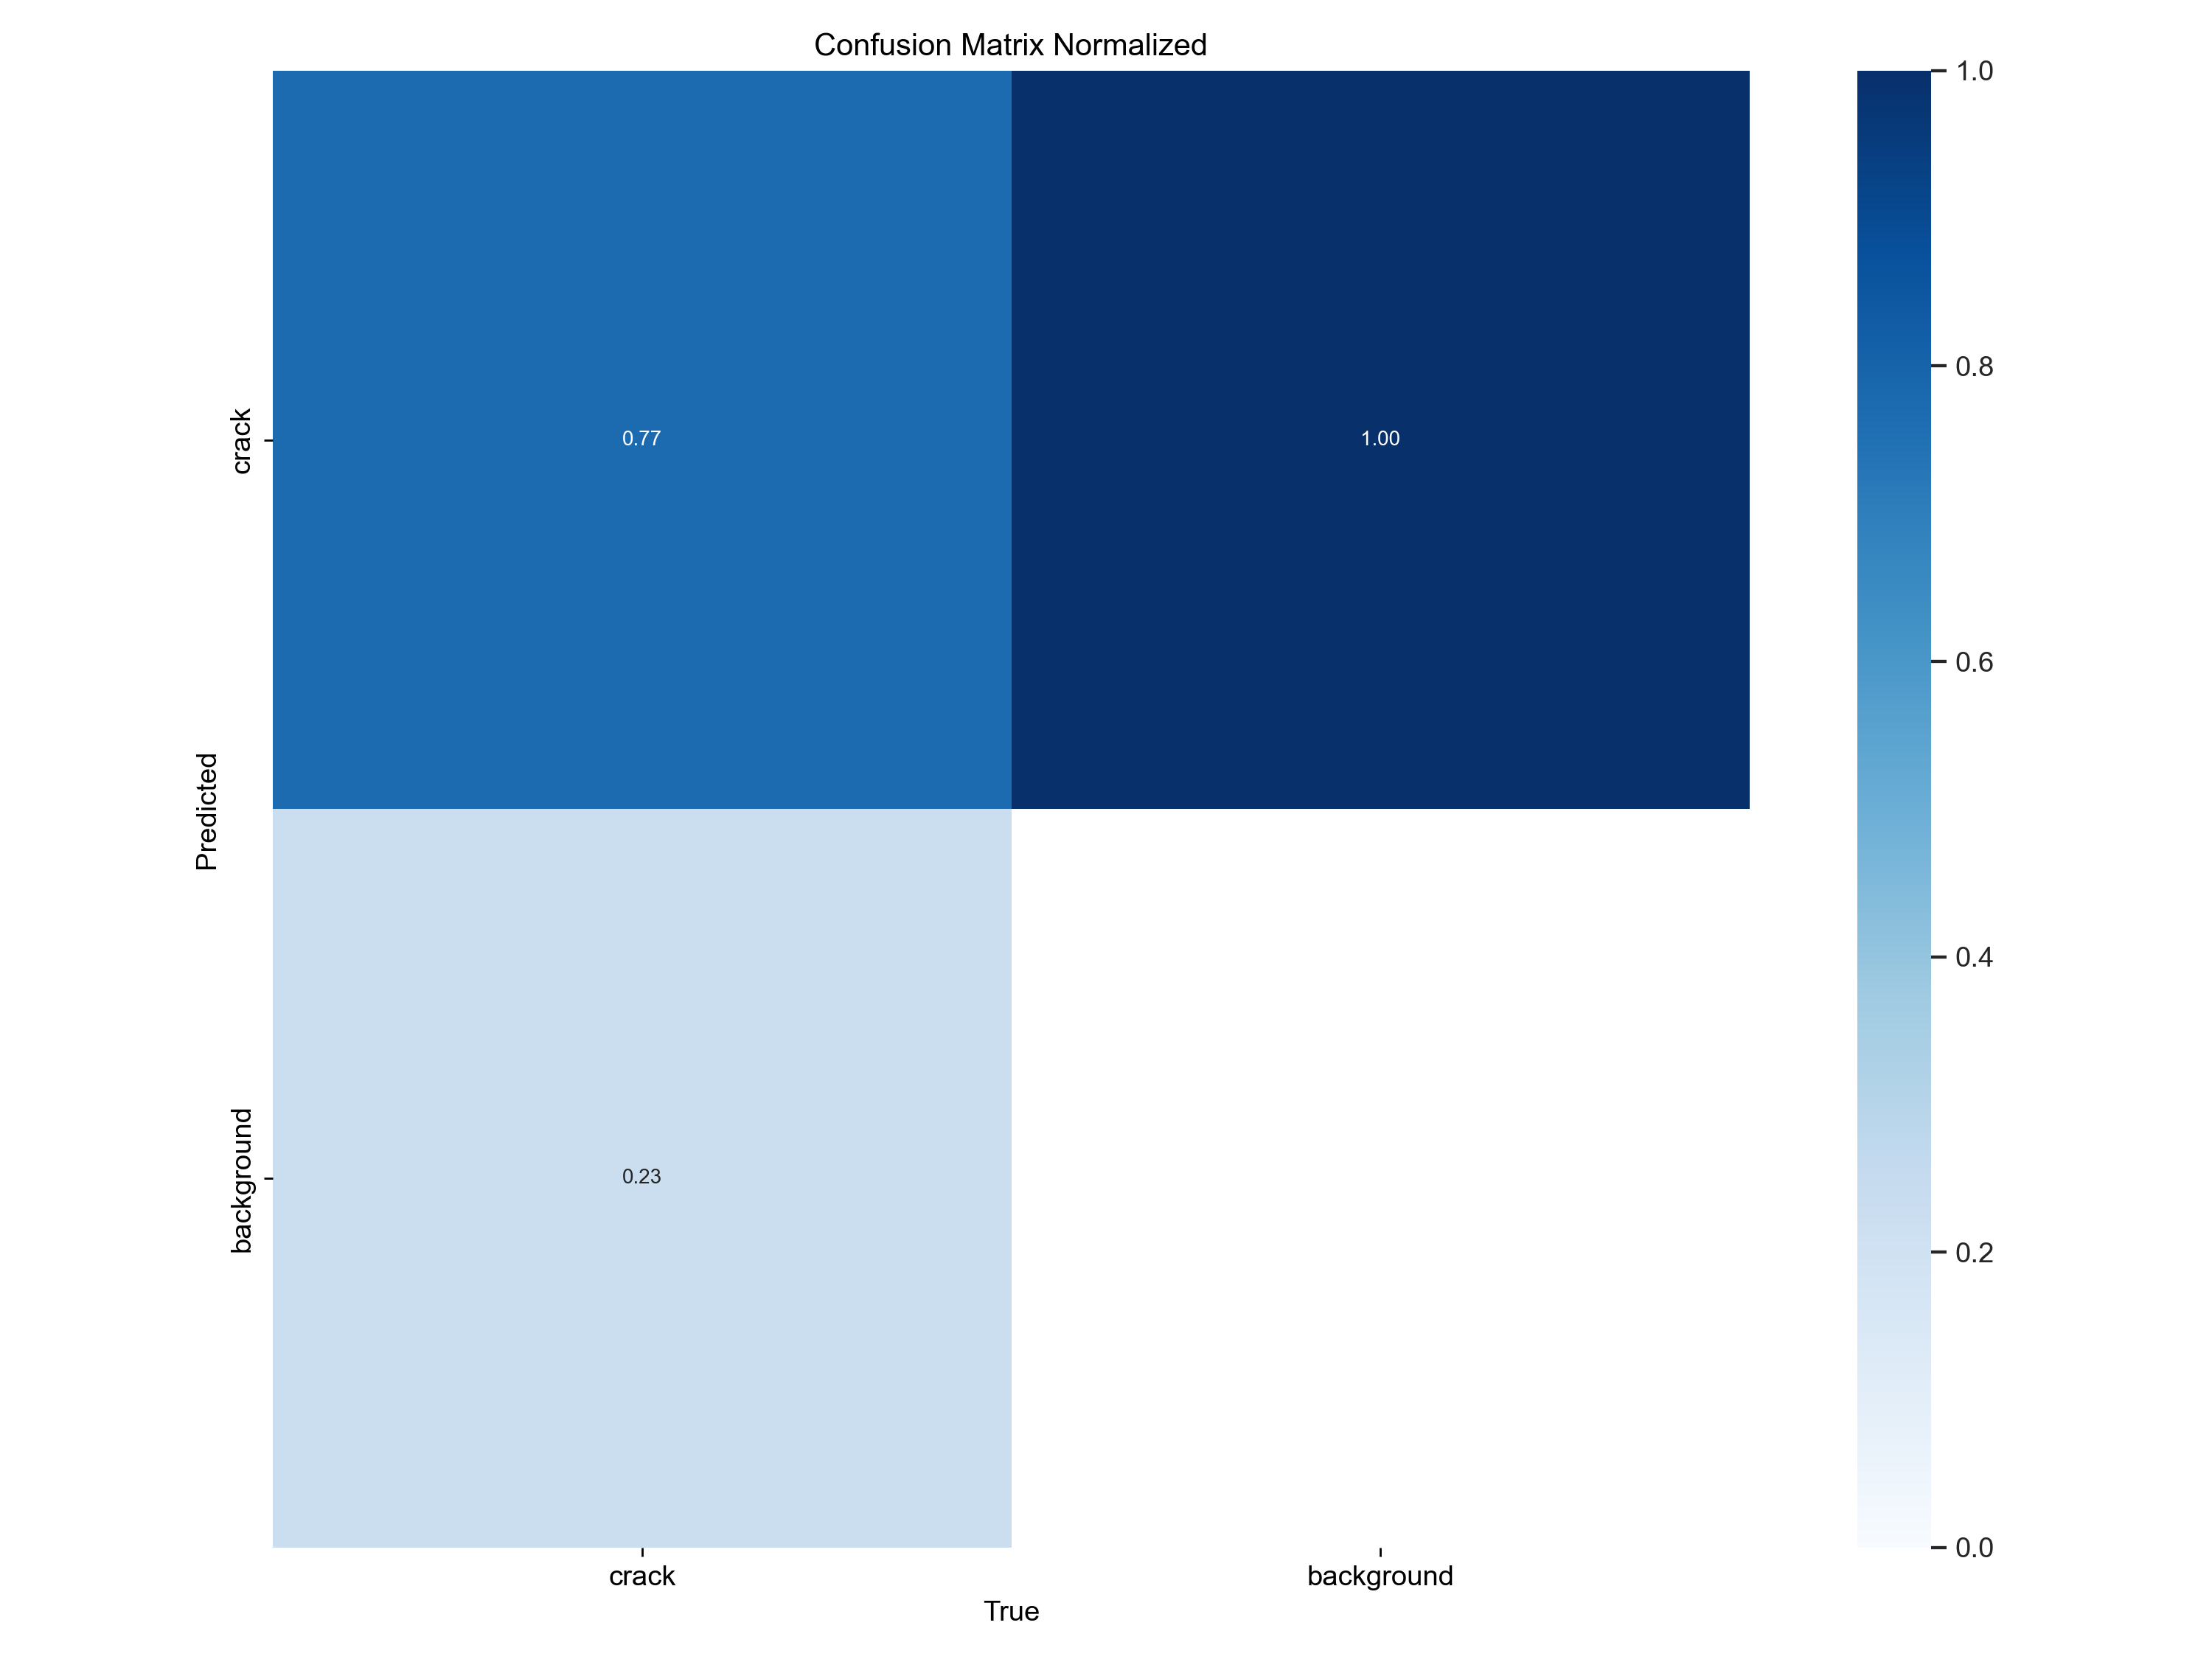

In [24]:
Image.open(image_path / "confusion_matrix_normalized.png")

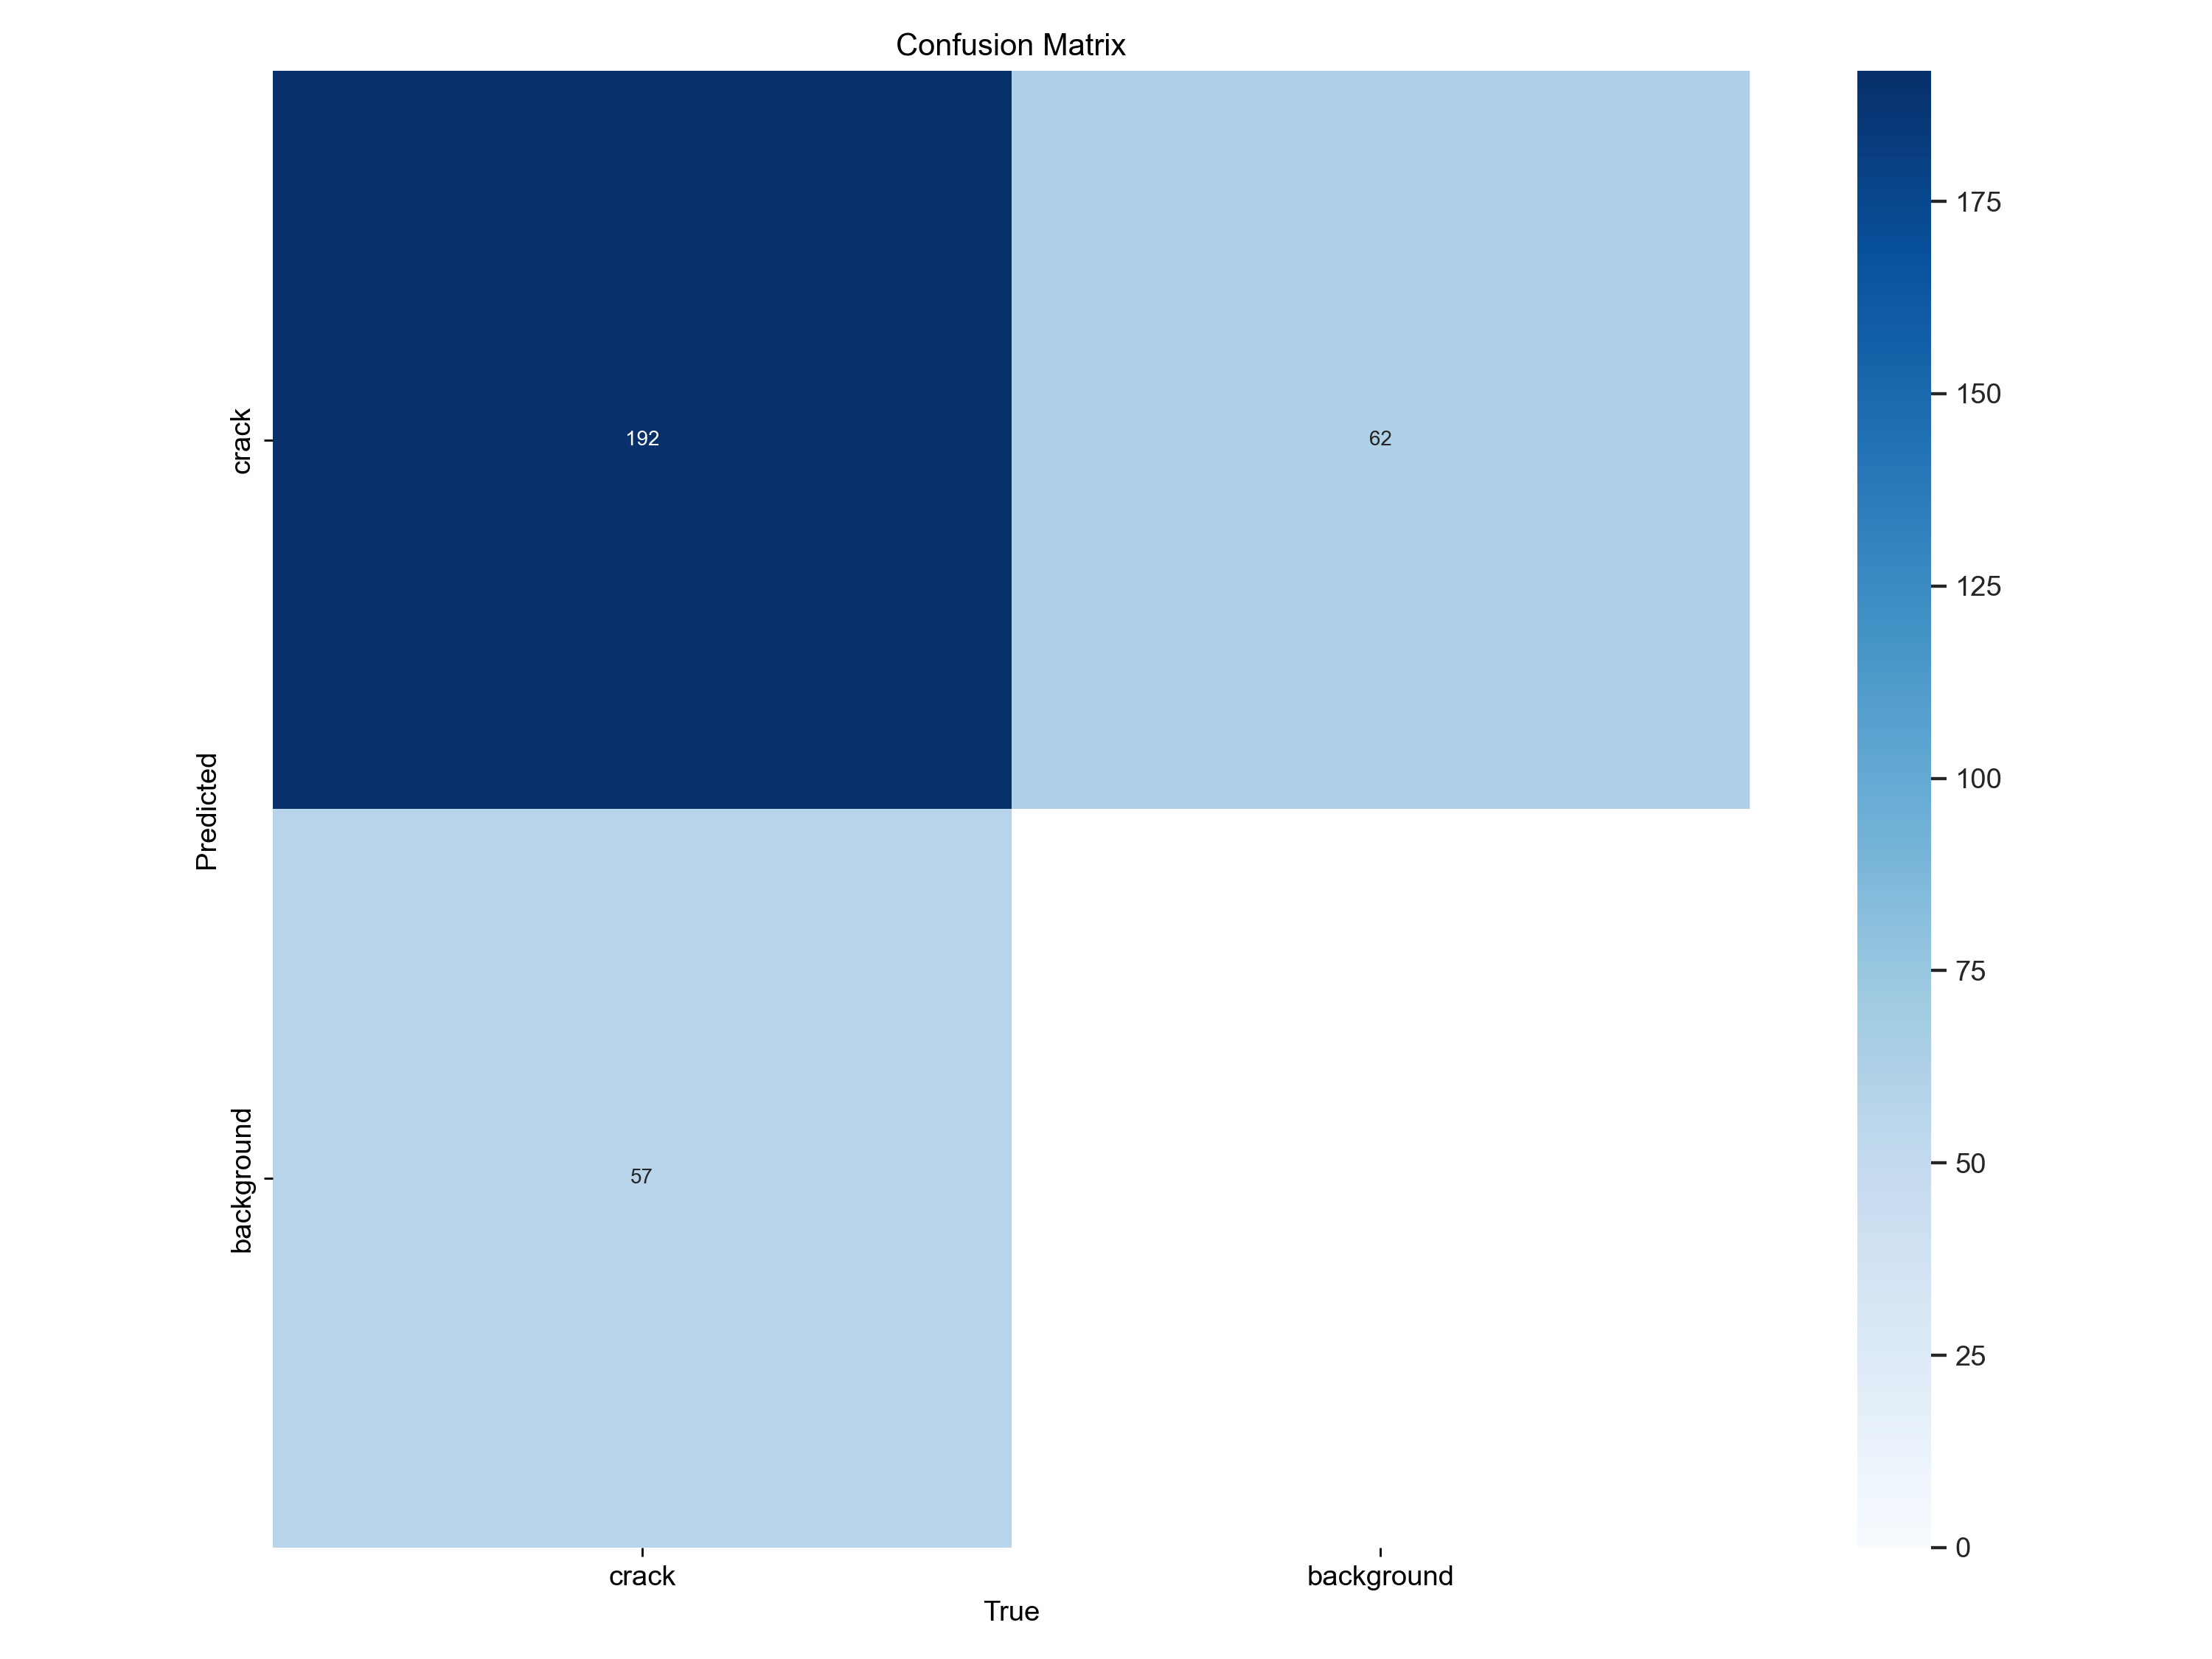

In [25]:
Image.open(image_path / "confusion_matrix.png")

In [27]:
df = pd.read_csv(str(image_path / "results.csv"))

df

,epoch,time,train/box_loss,train/seg_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),...,metrics/recall(M),metrics/mAP50(M),metrics/mAP50-95(M),val/box_loss,val/seg_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,390.937,1.69638,1.85813,1.73331,1.43538,0.39909,0.48594,0.33536,0.09798,...,0.41365,0.24712,0.05388,2.39245,1.36223,1.86598,2.25190,0.000666,0.000666,0.000666
1,2,703.566,1.65778,1.71500,1.51756,1.47533,0.56367,0.59839,0.52527,0.19661,...,0.50602,0.37230,0.08967,2.09137,1.33351,1.69305,2.07551,0.001289,0.001289,0.001289
2,3,1046.880,1.51221,1.67332,1.38961,1.38174,0.41918,0.36948,0.32858,0.12197,...,0.46586,0.38703,0.12004,2.27342,1.34462,1.93442,2.06854,0.001868,0.001868,0.001868
3,4,1414.760,1.45876,1.65177,1.29900,1.34807,0.69280,0.51406,0.56464,0.27407,...,0.48594,0.46509,0.11562,1.85560,1.37636,1.63868,1.93176,0.001802,0.001802,0.001802
4,5,1699.030,1.33545,1.58959,1.23823,1.28909,0.68565,0.65462,0.64562,0.36635,...,0.60241,0.56460,0.16763,1.60824,1.25564,1.43661,1.69749,0.001736,0.001736,0.001736
5,6,1988.100,1.29265,1.58057,1.20214,1.27563,0.76783,0.62426,0.65694,0.33477,...,0.55823,0.49968,0.13930,1.68766,1.24744,1.44794,1.82552,0.001670,0.001670,0.001670
6,7,2154.090,1.26182,1.52329,1.16733,1.26262,0.74554,0.67068,0.66665,0.40026,...,0.63500,0.58251,0.18875,1.50932,1.21884,1.33365,1.65634,0.001604,0.001604,0.001604
7,8,2318.600,1.18685,1.50965,1.08146,1.21975,0.79870,0.68273,0.69645,0.37864,...,0.62249,0.55066,0.17288,1.56128,1.19886,1.27535,1.67944,0.001538,0.001538,0.001538
8,9,2463.260,1.17462,1.52674,1.07740,1.21477,0.67448,0.65740,0.65580,0.36411,...,0.57028,0.56960,0.19450,1.49373,1.19007,1.43439,1.59272,0.001472,0.001472,0.001472
9,10,2606.800,1.15867,1.51781,1.05312,1.19775,0.70631,0.67608,0.67593,0.40295,...,0.64121,0.59709,0.18815,1.49085,1.17619,1.28286,1.63778,0.001406,0.001406,0.001406


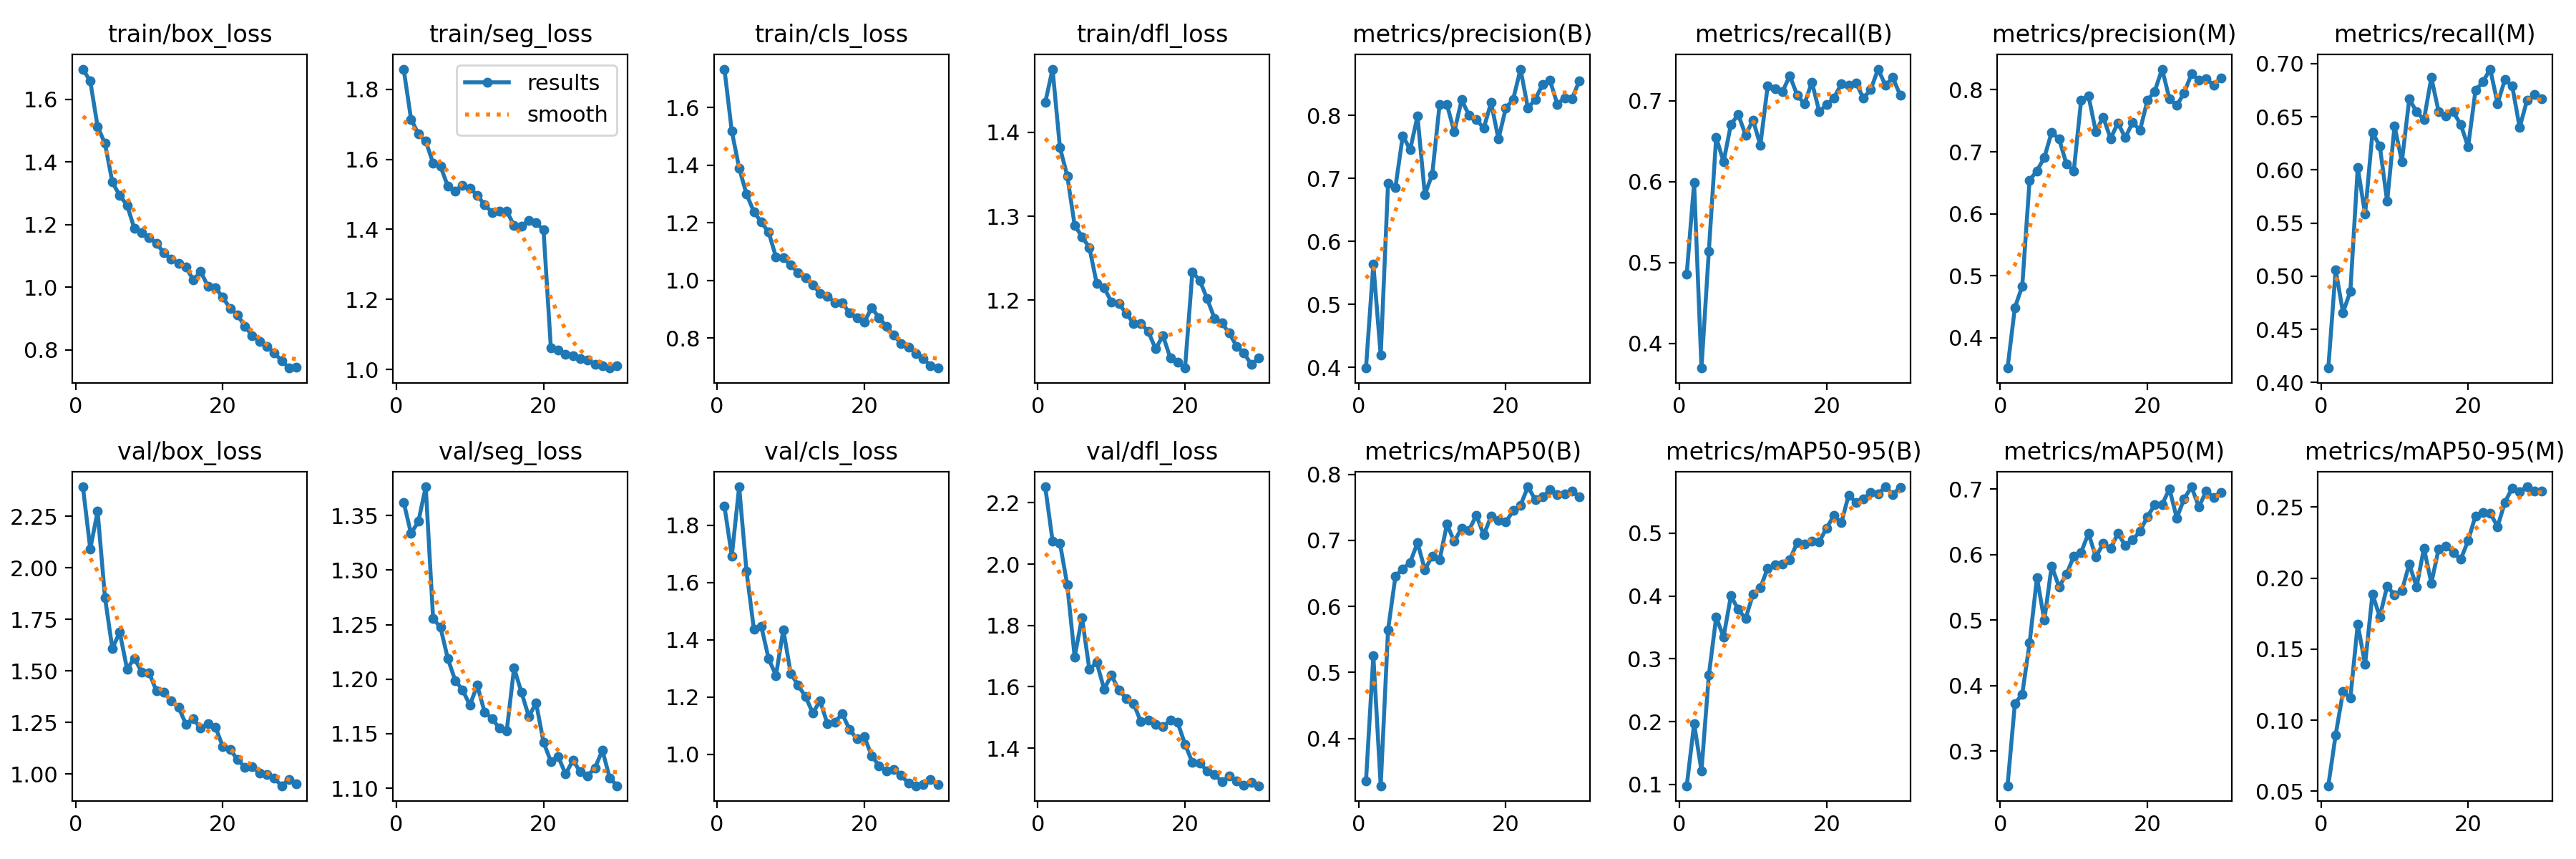

In [28]:
Image.open(image_path / "results.png")